# Kaggle Survey 2020

This Notebook will perform Exploratory Data Analysis in the Kaggle Data Science Survey of 2020.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

file_path = """Kaggle Data Science Survey 2020/kaggle_survey_2020_responses.csv"""

survey_df = pd.read_csv(file_path)
questions = survey_df.loc[0]

survey_df = survey_df.drop(survey_df.index[0])

In [17]:
# pd.set_option('display.max_rows', 500)
# dict_questions = questions.to_dict()

# # display(survey_df.head().T)
# display(dict_questions)


Some questions that would be interesting to answer with this Data:
- How variable is the yearly compensation between people working with Data? How does this value change when we look at different roles and countries? (Q-24, Q-3, Q-5)
- Does the gender gap (if there is one) changes when we look at different age groups? (Q-1, Q-2)
- Which languages are more popular across different age groups? (Q-7, Q-1)
- What are the most popular Big Data programs? Which programs people want to learn how to use? (Q-29)
- What are the most popular media source on data science topics? (Q-39)

### How variable is the yearly compensation between people working with Data? How does this value change when we look at different roles and countries?

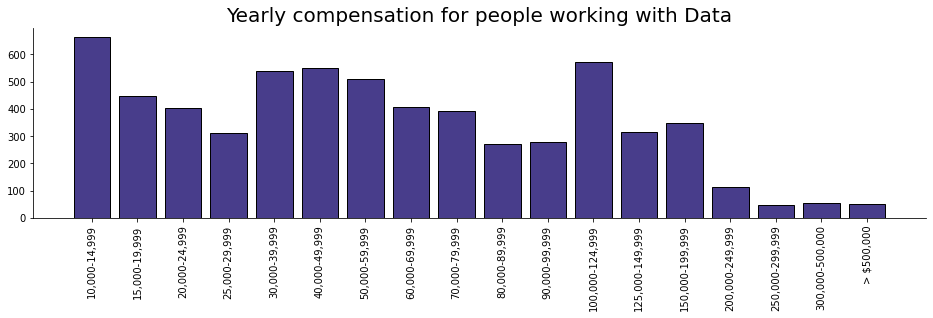

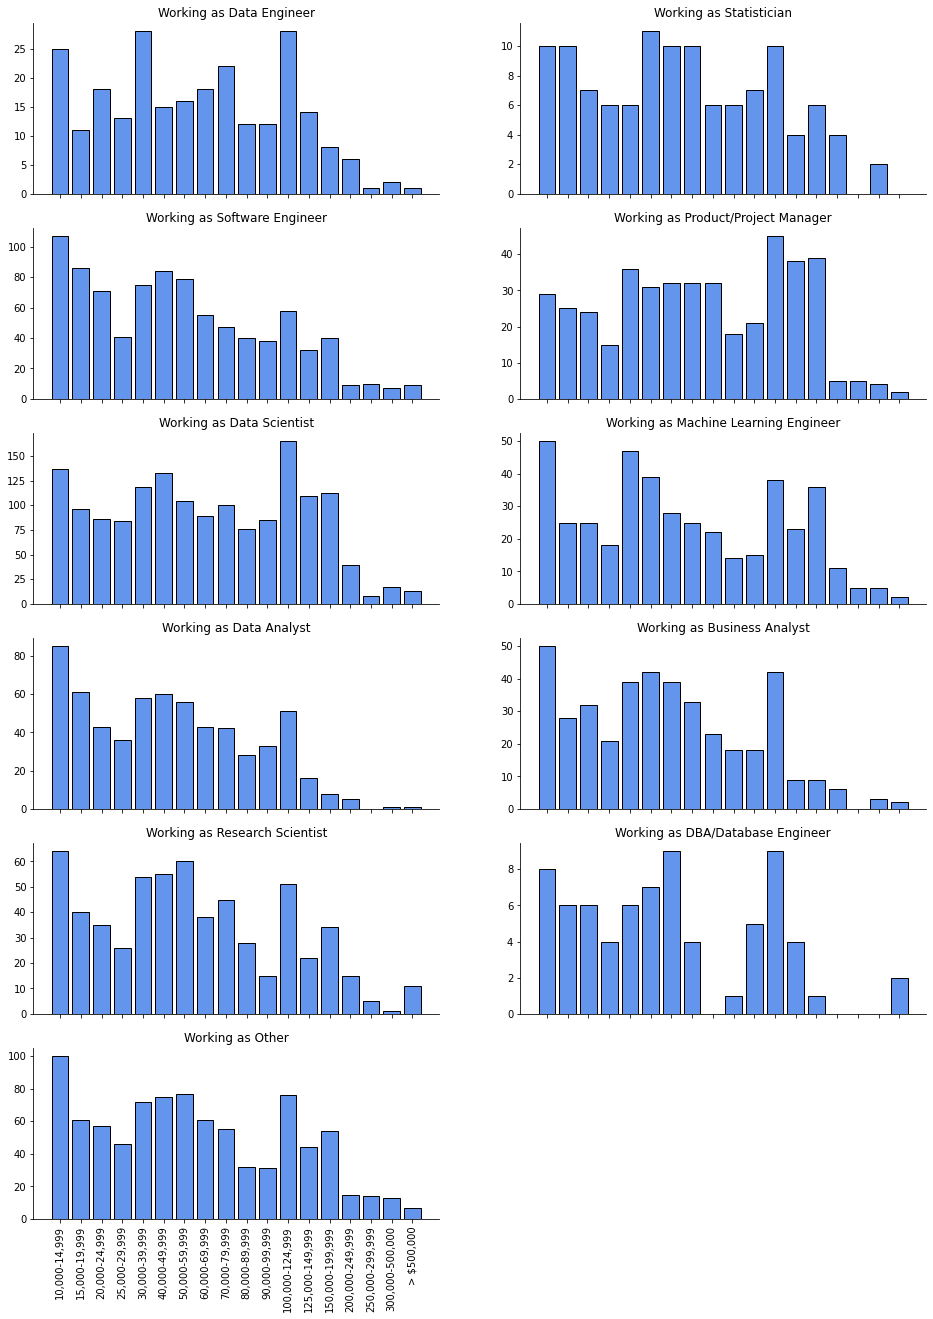

In [7]:
# I decided to eliminate the < 10,000 group because I believe part of the respondents answered thinking about compensation on 
# a monthly basis.
survey_df['Q24_Clean'] = survey_df['Q24'].apply(lambda x: "< 10,000" if x in ['1,000-1,999', '$0-999', '4,000-4,999', 
                                                                              '7,500-9,999', '5,000-7,499', '2,000-2,999', 
                                                                              '3,000-3,999',] else x)

ordered_wage = ['10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', 
                '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999', 
                '125,000-149,999', '150,000-199,999', '200,000-249,999', '250,000-299,999', '300,000-500,000', '> $500,000']

Q24 = survey_df['Q24_Clean'].value_counts().drop("< 10,000").reindex(ordered_wage)

fig2, ax2 = plt.subplots(figsize = (16, 3.5))

ax2.set_title("Yearly compensation for people working with Data", size=20)
ax2.bar(Q24.index, Q24, color='darkslateblue', edgecolor='black')
ax2.set_xticklabels(ordered_wage, rotation=90)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


fig, ax = plt.subplots(6, 2,figsize=(16, 22), sharex=True)
# fig.suptitle('Compensation by type of job')

job_names = survey_df['Q5'].dropna().unique().tolist()
job_names.remove('Student')
job_names.remove('Currently not employed')


for i, job in enumerate(job_names):
    aux = survey_df[survey_df['Q5'] == job]['Q24_Clean'].value_counts().drop("< 10,000").reindex(ordered_wage)
    ax[i%6][i//6].bar(aux.index, aux, color='cornflowerblue', edgecolor='black')
    ax[i%6][i//6].set_title(f"Working as {job}")
    ax[i%6][i//6].spines['right'].set_visible(False)
    ax[i%6][i//6].spines['top'].set_visible(False)

    
ax[-1][-1].set_visible(False)
ax[-1][0].set_xticklabels(ordered_wage, rotation=90)
ax[-2][1].set_xticklabels(ordered_wage, rotation=90)
    
plt.show()
    

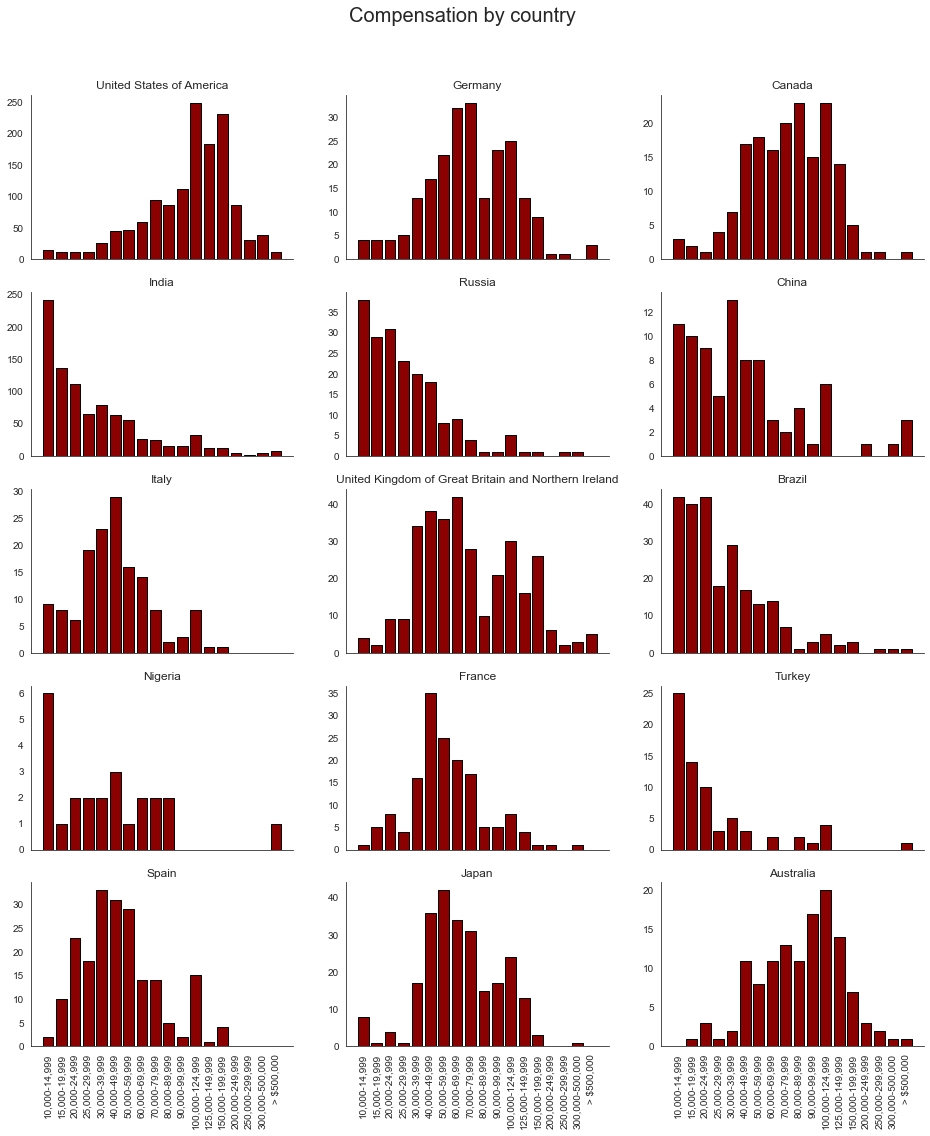

In [8]:
# Creating the same visualization, but now for countries
entries_per_country = pd.DataFrame(survey_df.groupby('Q3')['Q24_Clean'].count().sort_values())

# We will only look at countries with at least 140 respondents
aux_df = entries_per_country[entries_per_country['Q24_Clean'] >= 140]
choosen_countries_df = survey_df[survey_df['Q3'].isin(aux_df.index.drop('Other'))]
choosen_countries_df = choosen_countries_df.dropna(subset=['Q24_Clean'])
countries = choosen_countries_df['Q3'].unique()

sns.set_style("white")
fig, ax = plt.subplots(5, 3,figsize=(16, 17.5), sharex=True)
fig.suptitle('Compensation by country', fontsize=20, y=0.95)

for i, country in enumerate(countries):
    aux = choosen_countries_df[choosen_countries_df['Q3'] == country]['Q24_Clean'].value_counts()\
                            .drop("< 10,000").reindex(ordered_wage)
    ax[i//3][i%3].bar(aux.index, aux, color='darkred', edgecolor='black')
    ax[i//3][i%3].set_title(country)
    ax[i//3][i%3].spines['right'].set_visible(False)
    ax[i//3][i%3].spines['top'].set_visible(False)

ax[-1][0].set_xticklabels(ordered_wage, rotation=90)
ax[-1][1].set_xticklabels(ordered_wage, rotation=90)
ax[-1][2].set_xticklabels(ordered_wage, rotation=90)

    
plt.show()

### Does the gender gap in the field (if there is one) changes when we look at different age groups?

In [9]:
#We will work with questions one and two. Let's check the values we find in these two questions.
# print(survey_df['Q1'].value_counts())
# print(survey_df['Q2'].value_counts())


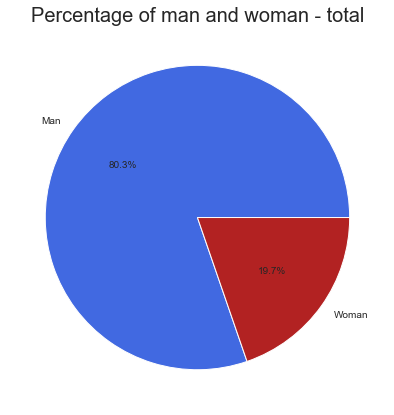

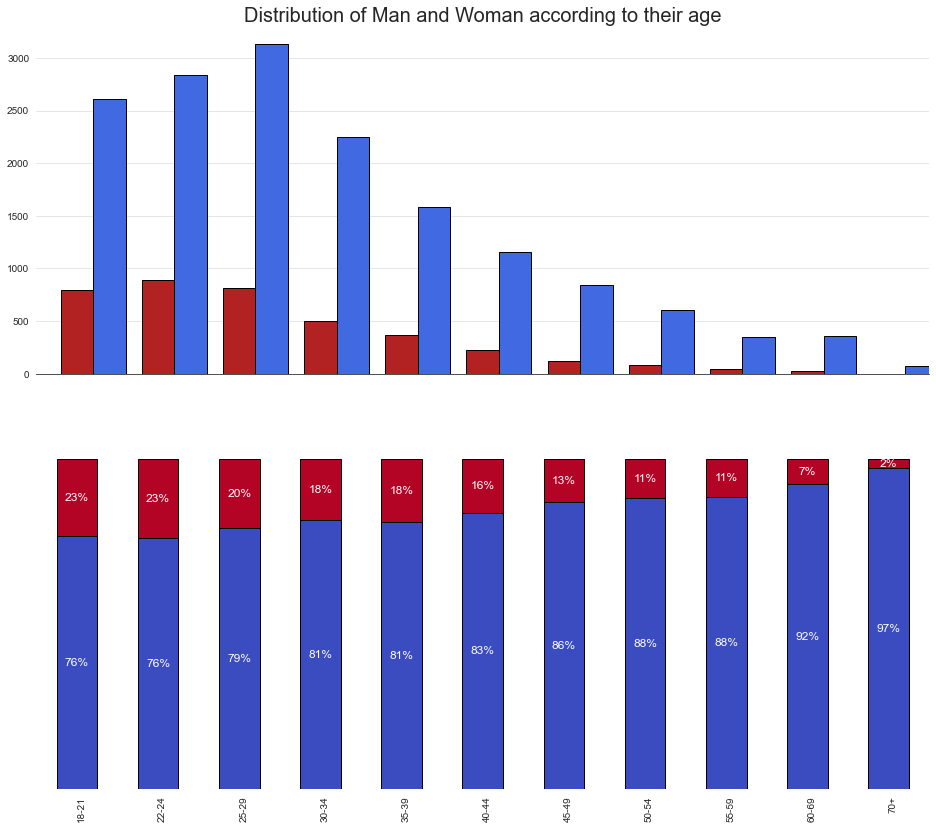

In [11]:
#Order the age groups properly
ordered_age = ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']

#filter genders
genders = ['Man', 'Woman']

fgender_df = survey_df[survey_df['Q2'].isin(genders)]

fig, ax = plt.subplots(1, 1, figsize = (16, 7))

gender = fgender_df.groupby('Q2').count()["Q1"]
gender = gender.div(gender.sum())

ax.pie(gender, labels=gender.index, autopct='%1.1f%%', colors=['royalblue', 'firebrick'])
ax.set_title('Percentage of man and woman - total', fontsize=20)
plt.show()


fig, ax = plt.subplots(2, 1, figsize = (16, 14), sharex=True)
width = 0.4


female_df = fgender_df[fgender_df['Q2'] == 'Woman']['Q1'].value_counts().reindex(ordered_age)
male_df = fgender_df[fgender_df['Q2'] == 'Man']['Q1'].value_counts().reindex(ordered_age)

# print(female_df)
pos_aux = np.arange(len(male_df.index))


ax[0].bar(female_df.index , female_df, width=width, color='firebrick', edgecolor='black', label='Woman')
ax[0].bar(pos_aux + width , male_df, width=width, color='royalblue', edgecolor='black', label='Man')

ax[1].set_xticklabels(female_df.index, ha = 'left')

ax[0].grid(axis='y', linestyle='-', alpha=0.6) 
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_title('Distribution of Man and Woman according to their age', fontsize=20)

aggregated_gender = pd.pivot_table(fgender_df, values = 'Q3', index = 'Q1', columns = 'Q2', aggfunc = 'count')
aggregated_total = fgender_df.groupby('Q1')['Q3'].count()
percentage_gender = aggregated_gender.div(aggregated_total, axis = 0)

percentage_gender.plot(kind='bar', stacked=True, colormap = 'coolwarm', xlabel="", ax=ax[1], legend=False,\
                       edgecolor='black')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)

for i, age in enumerate(percentage_gender.index):
   ax[1].annotate("{}%".format(int(percentage_gender.loc[age, "Man"]*100)), xy = (i, percentage_gender.loc[age, "Man"]/2),\
                          va='center', ha='center', color = 'white', fontsize = 12)
   ax[1].annotate("{}%".format(int(percentage_gender.loc[age, "Woman"]*100)), xy = (i, (1-percentage_gender.loc[age, "Woman"]/2)),\
                          va='center', ha='center', color = 'white', fontsize = 12)

ax[1].axes.yaxis.set_ticks([])
plt.show()

### Which languages are more popular between young people? Is There a difference between languages being used in the market by professionals and languages being used by enthusiasts? (Q-7, Q-1)

In [12]:
# 'Q7_Part_1': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',
# 'Q7_Part_2': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R',
# 'Q7_Part_3': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL',
# 'Q7_Part_4': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C',
# 'Q7_Part_5': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++',
# 'Q7_Part_6': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java',
# 'Q7_Part_7': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript',
# 'Q7_Part_8': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia',
# 'Q7_Part_9': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift',
# 'Q7_Part_10': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash',
# 'Q7_Part_11': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB',
# 'Q7_Part_12': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None',
# 'Q7_OTHER': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other',

languages_age = survey_df.groupby('Q1')[['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5'
                                        , 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10'
                                        , 'Q7_Part_11', 'Q7_OTHER']].count()

# print(languages_age.columns)

languages_age.columns = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'Other']

age_total = survey_df.groupby('Q1')['Q2'].count()

languages_age = languages_age.div(age_total, axis = 0)

# print(languages_age)
# print(age_total)

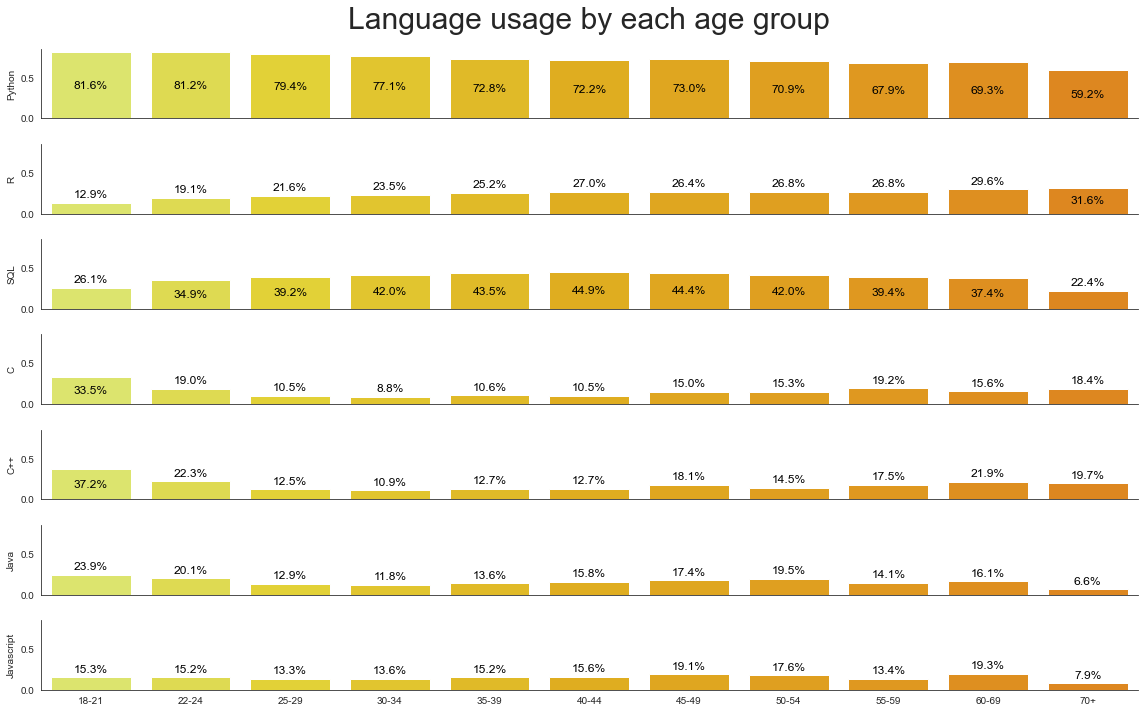

In [13]:
languages_age.index.name = None
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(16, 10), sharex = True, sharey = True)

age_list = ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49']

#sns.barplot(x = languages_age.index  , y = languages_age.iloc[:, 0], ax = ax1, pallete = 'rocket')
#ax1.set_ylabel(languages_age.columns[0])


def graphic_test(ax, index_i, color = 'rocket'):
    sns.barplot(x = languages_age.index , y = languages_age.iloc[:, index_i], ax = ax, palette = color) 
    ax.set_ylabel(languages_age.columns[index_i])
#     ax.axhline(0, color="k", clip_on=False)
    for i2, element in enumerate(languages_age.iloc[:, index_i].tolist()):
        if element >= 0.3:
            ax.annotate("{}%".format(round(element*100, 1)), xy = (i2, element/2), va='center', ha='center', \
                        color = 'black', fontsize = 12)
        else:
            ax.annotate("{}%".format(round(element*100, 1)), xy = (i2, element + 0.1), va='center', ha='center', \
                        color = 'black', fontsize = 12)
            
    return None  

ax1.set_title('Language usage by each age group', fontsize= 30, y=1.2)  

axes_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for i, axe in enumerate(axes_list):
    graphic_test(axe, i, color = 'Wistia')
  
  

plt.tight_layout(h_pad=2)
sns.despine(bottom=False)
plt.show()


### What are the most used programs and which ones people want to learn about (Q-29)

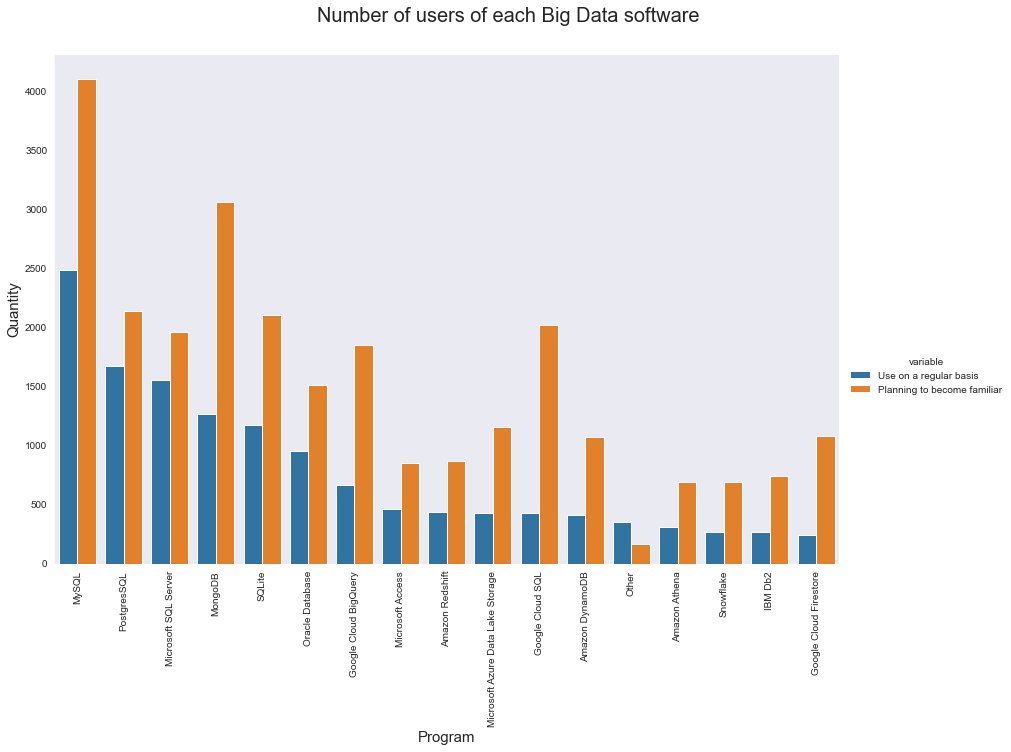

In [14]:
#Q29A 'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) 
#      do you use on a regular basis? (Select all that apply)
#Q29B 'Which of the following big data products (relational databases, data warehouses, data lakes, or similar)
#      do you hope to become more familiar with in the next 2 years? (Select all that apply)

#Part1 MySQL
#Part2 PostgresSQL
#Part3 SQLite
#Part4 Oracle Database
#Part5 MongoDB
#Part6 Snowflake
#Part7 IBM Db2
#Part8 Microsoft SQL Server
#Part9 Microsoft Access
#Part10 Microsoft Azure Data Lake Storage
#Part11 Amazon Redshift
#Part12 Amazon Athena
#Part13 Amazon DynamoDB
#Part14 Google Cloud BigQuery
#Part15 Google Cloud SQL
#Part16 Google Cloud Firestore
#Part17 None
#Other

question29 = [name for name in survey_df.columns if 'Q29' in name]
q29a = [name for name in question29 if '_A_' in name]
q29b = [name for name in question29 if '_B_' in name]

df_q29a = survey_df[q29a]
df_q29b = survey_df[q29b]

df_q29a.columns = ['MySQL', 'PostgresSQL', 'SQLite', 'Oracle Database', 'MongoDB', 'Snowflake', 'IBM Db2', 'Microsoft SQL Server',
                   'Microsoft Access', 'Microsoft Azure Data Lake Storage', 'Amazon Redshift', 'Amazon Athena', 'Amazon DynamoDB',
                   'Google Cloud BigQuery', 'Google Cloud SQL', 'Google Cloud Firestore', 'None', 'Other']
df_q29b.columns = ['MySQL', 'PostgresSQL', 'SQLite', 'Oracle Database', 'MongoDB', 'Snowflake', 'IBM Db2', 'Microsoft SQL Server',
                   'Microsoft Access', 'Microsoft Azure Data Lake Storage', 'Amazon Redshift', 'Amazon Athena', 'Amazon DynamoDB',
                   'Google Cloud BigQuery', 'Google Cloud SQL', 'Google Cloud Firestore', 'None', 'Other']

dict_a = {}
dict_b = {}
aux = 0

for column in df_q29a.columns:
    aux = df_q29a[column].value_counts()[0]
    dict_a[column] = aux
    aux = df_q29b[column].value_counts()[0]
    dict_b[column] = aux
    
merged_q29 = pd.DataFrame({'Use on a regular basis' : pd.Series(dict_a), 'Planning to become familiar' : pd.Series(dict_b)})\
                .sort_values('Use on a regular basis', ascending=False).drop('None')
merged_q29_test = pd.melt(merged_q29.reset_index(),id_vars = ['index'], value_vars = ['Use on a regular basis', 
                                                                                      'Planning to become familiar'])
# print(merged_q29.head())
# print(merged_q29_test)

sns.set_style("dark")
f = sns.catplot(x='index', y='value' , hue='variable', data=merged_q29_test, kind='bar', height=8.27, aspect=11.7/8.27)
f.set_xticklabels(rotation=90)
plt.subplots_adjust(top=0.9) 
f.fig.suptitle('Number of users of each Big Data software', size = 20)

f.set_xlabels('Program', fontsize=15) # not set_label
f.set_ylabels('Quantity', fontsize=15)

plt.show()


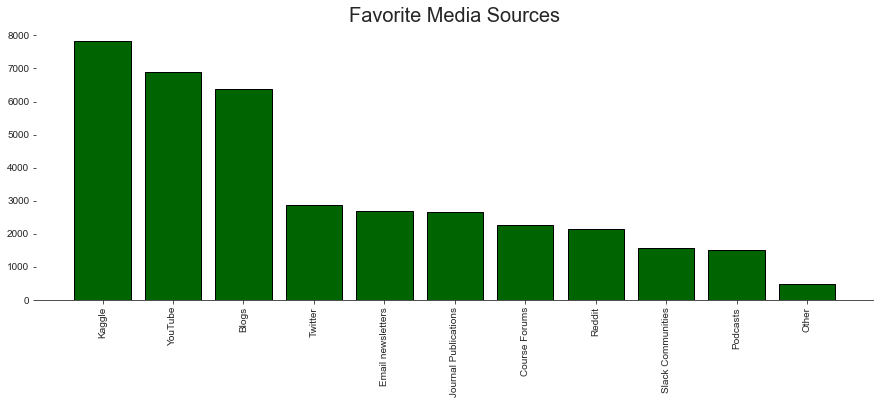

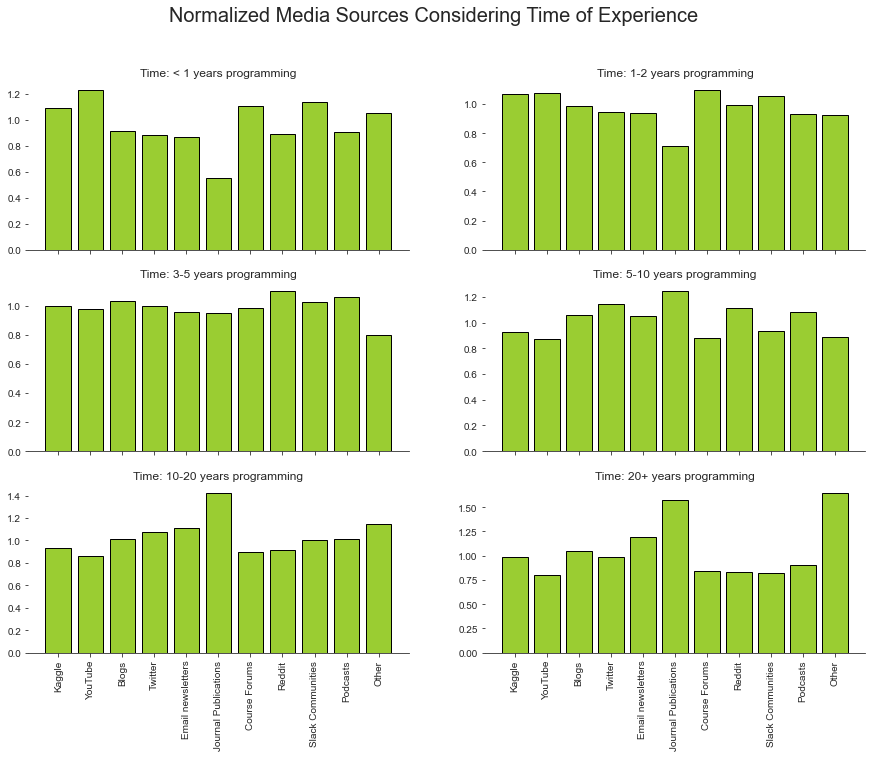

In [16]:
# 'Q39_Part_1': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - 
# Selected Choice - Twitter (data science influencers)',
#  'Q39_Part_2': "Who/what are your favorite media sources that report on data science topics? (Select all that apply) - 
# Selected Choice - Email newsletters (Data Elixir, O'Reilly Data & AI, etc)",
#  'Q39_Part_3': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - 
# Selected Choice - Reddit (r/machinelearning, etc)',
#  'Q39_Part_4': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - 
# Selected Choice - Kaggle (notebooks, forums, etc)',
#  'Q39_Part_5': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - 
# Selected Choice - Course Forums (forums.fast.ai, Coursera forums, etc)',
#  'Q39_Part_6': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - 
# Selected Choice - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)',
#  'Q39_Part_7': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - 
# Selected Choice - Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)',
#  'Q39_Part_8': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - 
# Selected Choice - Blogs (Towards Data Science, Analytics Vidhya, etc)',
#  'Q39_Part_9': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - 
# Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)',
#  'Q39_Part_10': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - 
# Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)',
#  'Q39_Part_11': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - 
# Selected Choice - None',
#  'Q39_OTHER': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - 
# Selected Choice - Other',

# 'Q6': 'For how many years have you been writing code and/or programming?'

q39 = [name for name in survey_df.columns if "Q39" in name]
q39.remove("Q39_Part_11")

q39_df = survey_df[q39]

q39_cname = ["Twitter", "Email newsletters", 'Reddit', 'Kaggle', 'Course Forums', 'YouTube',
                  'Podcasts', 'Blogs', 'Journal Publications', 'Slack Communities', 'Other']

q39_df.columns = q39_cname

q39_summary = pd.melt(q39_df).groupby('variable').count().sort_values('value', ascending=False)
total_points = q39_summary.sum()
percentage_total = q39_summary.div(total_points)
# print(q39_summary)
# print(q39_summary.sum())

# Getting the new order to apply to the other plots
q39_cname_2 = q39_summary.index
# print(type(q39_summary))

sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(15, 5))


ax.bar(q39_summary.index, q39_summary['value'], edgecolor='black', color='darkgreen')
ax.set_title("Favorite Media Sources", fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticklabels(q39_summary.index, rotation=90)

fig2, ax2 = plt.subplots(3, 2, figsize=(15, 10.5), sharex=True)

fig2.suptitle("Normalized Media Sources Considering Time of Experience", fontsize = 20)

experience = ['< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']

for i, band in enumerate(experience):
    aux_df = survey_df[survey_df['Q6'] == band][q39]
    aux_df.columns = q39_cname
    aux_df = pd.melt(aux_df).groupby('variable').count().reindex(q39_cname_2)
    # "Normalizing" by experience to see what sources are more relevant to seasoned programmers when compared with the others 
    group_points = aux_df.sum()
    aux_df = aux_df.div(group_points)
    aux_df = aux_df.div(percentage_total)
    ax2[i//2][i%2].bar(aux_df.index, aux_df['value'], edgecolor='black', color='yellowgreen')
    ax2[i//2][i%2].spines['right'].set_visible(False)
    ax2[i//2][i%2].spines['top'].set_visible(False)
#     ax2[i//2][i%2].spines['bottom'].set_visible(False)
    ax2[i//2][i%2].spines['left'].set_visible(False)
    ax2[i//2][i%2].set_xticklabels(aux_df.index, rotation=90)
    ax2[i//2][i%2].set_title(f"Time: {band} programming", fontsize=12)

plt.show()